In [16]:
# preprocessing step 1: convert the h264 to mp4

import glob
import os
import subprocess

videos = "../videos/videos_tags/videos_tags_mp4"

if not os.path.exists(videos):
    os.mkdir(videos)

# Title

In [20]:
for video in glob.glob(os.path.join('../videos/videos_tags/', '*.h264')):  
    path = os.path.split(video)   
    video_mp4 = os.path.join(path[0],"videos_tags_mp4",os.path.splitext(path[1])[0] + '.mp4')

    print(video_mp4)
    subprocess.call(['ffmpeg', '-framerate', '2', '-fflags', '+genpts', '-i', video, '-c', 'copy', video_mp4])
    break

../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-01-08-13.mp4


In [3]:
%env KERAS_BACKEND=theano
%env THEANO_FLAGS=floatX=float32,device=cpu

env: KERAS_BACKEND=theano
env: THEANO_FLAGS=floatX=float32,device=cpu


In [4]:
%load_ext autoreload
%autoreload 1
%aimport bb_behavior
%aimport bb_behavior.plot
%aimport bb_behavior.tracking
%aimport bb_behavior.tracking.pipeline

import bb_behavior
import bb_behavior.plot
import bb_behavior.tracking
import bb_behavior.tracking.pipeline

Using Theano backend.


## Run

In [5]:
default_pipeline = None

In [6]:
from bb_behavior.tracking.pipeline import get_default_pipeline
default_pipeline = get_default_pipeline(localizer_threshold="0.65")

/home/tscho/.local/lib/python3.6/site-packages/keras/backend/theano_backend.py:1032: UserWarning: DEPRECATION: the 'ds' parameter is not going to exist anymore as it is going to be replaced by the parameter 'ws'.
  mode='max')
/home/tscho/.local/lib/python3.6/site-packages/keras/backend/theano_backend.py:1032: UserWarning: DEPRECATION: the 'st' parameter is not going to exist anymore as it is going to be replaced by the parameter 'stride'.
  mode='max')
/home/tscho/.local/lib/python3.6/site-packages/keras/backend/theano_backend.py:1032: UserWarning: DEPRECATION: the 'padding' parameter is not going to exist anymore as it is going to be replaced by the parameter 'pad'.
  mode='max')


In [7]:
from tqdm import tqdm_notebook # progress bar

import math
import numpy as np
from bb_tracking.data.constants import DETKEY
#from bb_tracking.tracking import score_id_sim_v
from bb_tracking.tracking import distance_orientations_v, distance_positions_v

from bb_behavior.tracking.pipeline import detect_markers_in_video
from bb_behavior.tracking.pipeline import track_detections_dataframe
from bb_behavior.tracking.pipeline import display_tracking_results
tqdm_notebook

<function tqdm.tqdm_notebook>

In [8]:

configs = [
        dict(path="../videos/videos_tags/e00_2018-08-19-01-08-13.h264",
             tag_pixel_diameter=50,
             n_frames=None,
             confidence_filter_detections=0.0,
             confidence_filter_tracks=0.0,
             coordinate_scale=1.0,
            start_time=None,
            fps=2.0,
            cam_id=0)
]
configs += [
        dict(path="/home/david/Downloads/20181122_00004_hevc.mp4",
             tag_pixel_diameter=24,
             n_frames=None,
             confidence_filter_detections=0.0,
             confidence_filter_tracks=0.0,
             coordinate_scale=1.0,
            start_time=None,
            fps=3.0,
            cam_id=0)
]
configs += [
        dict(path="../videos/videos_mp4/e00_2018-09-09-00-00-11.mp4",
             tag_pixel_diameter=15,
             n_frames=100,
             confidence_filter_detections=0.0,
             confidence_filter_tracks=0.0,
             coordinate_scale=1.0,
            start_time=None,
            fps=2.0,
            cam_id=0)
]
configs += [
        dict(path="/home/david/Downloads/ants/20181129_1.mp4",
             tag_pixel_diameter=30,
             n_frames=None,
             confidence_filter_detections=0.0,
             confidence_filter_tracks=0.0,
             coordinate_scale=1.0,
            start_time=None,
            fps=4.0,
            cam_id=0)
]
config=configs[0]
config

{'cam_id': 0,
 'confidence_filter_detections': 0.0,
 'confidence_filter_tracks': 0.0,
 'coordinate_scale': 1.0,
 'fps': 2.0,
 'n_frames': None,
 'path': '../videos/videos_tags/e00_2018-08-19-01-08-13.h264',
 'start_time': None,
 'tag_pixel_diameter': 50}

In [9]:
num_processed_videos = 0
video_data = dict()
frame_info = None
detections = None


for config in tqdm_notebook(configs):
    start_time, path = config["start_time"], config["path"]
    cam_id = config["cam_id"]#int(path[cam_id_idx])
    #pipelines.reset(4)
    
    try:
        num_processed_videos += 1

        frame_info, detections = detect_markers_in_video(path,
                                                      pipeline=default_pipeline,#pipeline=pipelines(),
                                                     tag_pixel_diameter=config["tag_pixel_diameter"],
                                                      n_frames=config["n_frames"],
                                                      fps=config["fps"],
                                                     progress="tqdm_notebook"
                                                             )
        tracks = track_detections_dataframe(detections,
                                            tracker="../tracker.det_score_fun.frag_score_fun.dill",
                                            confidence_filter_detections=config["confidence_filter_detections"],
                                           confidence_filter_tracks=config["confidence_filter_tracks"],
                                            coordinate_scale=config["coordinate_scale"]
                                           )
        
        
        video_data[path] = (frame_info, detections, tracks)
    
    except Exception as err:
        print(err)
        raise
    # only first vid
    break
    

Widget Javascript not detected.  It may not be installed or enabled properly.


Widget Javascript not detected.  It may not be installed or enabled properly.


/home/tscho/anaconda3/lib/python3.6/site-packages/sklearn/base.py:312: UserWarning: Trying to unpickle estimator StandardScaler from version 0.20.0 when using version 0.19.0. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/home/tscho/anaconda3/lib/python3.6/site-packages/sklearn/base.py:312: UserWarning: Trying to unpickle estimator LinearSVC from version 0.20.0 when using version 0.19.0. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/home/tscho/anaconda3/lib/python3.6/site-packages/sklearn/base.py:312: UserWarning: Trying to unpickle estimator Pipeline from version 0.20.0 when using version 0.19.0. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/home/tscho/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a fut

In [10]:
tracks

,id,localizerSaliency,beeID,xpos,ypos,camID,zrotation,timestamp,frameIdx,confidence,track_id,track_confidence,bee_id
0,f17069737406154673478d0c0,0.688078,"[0.99784017, 0.0001437068, 0.0003311038, 1.132...",912.430529,126.998674,0,0.089175,0.0,0,9.942605e-01,0,0.519272,1926
0,f14098289308969885397d0c0,0.674689,"[0.9999927, 4.169345e-05, 1.1622906e-06, 8.046...",974.536364,126.958956,0,-0.139244,0.5,1,9.885683e-01,0,0.519272,1926
0,f15425634447854095266d0c0,0.687777,"[0.99854314, 0.21899119, 0.00043278933, 0.0002...",1087.552650,127.151928,0,0.046847,1.5,3,3.766603e-01,0,0.519272,1926
0,f17660719808085026240d0c0,0.667169,"[0.5131483, 0.01077801, 0.0011860728, 0.000248...",1311.874615,115.248051,0,-0.094585,3.5,7,1.358892e-02,0,0.519272,1926
0,f11597229837570887349d0c0,0.660274,"[0.9984825, 3.299117e-05, 2.9087067e-05, 4.231...",1199.793835,262.587893,0,2.071011,7.5,15,9.168164e-01,0,0.519272,1926
0,f11870078909659969642d0c0,0.655578,"[0.99990785, 5.8054924e-05, 4.172325e-07, 3.87...",1212.585613,251.046106,0,1.911840,11.5,23,4.997132e-01,0,0.519272,1926
0,f9360422352962879041d0c0,0.669532,"[0.8353583, 0.026736587, 0.0665628, 0.01522532...",549.873152,186.494644,0,-3.001573,19.0,38,1.168070e-03,1,0.671165,1926
0,f12646340377563239243d0c0,0.670466,"[0.99635774, 0.03613785, 0.023948759, 0.001328...",512.545910,173.826654,0,-2.718555,19.5,39,1.179060e-01,1,0.671165,1926
0,f16466747872510081124d0c0,0.704565,"[0.9933269, 0.6648356, 0.006554663, 0.00013861...",462.318939,123.780151,0,-2.803945,20.0,40,1.210965e-01,1,0.671165,1926
0,f12642271464920152220d0c0,0.694593,"[0.9978933, 0.007896394, 0.0006965697, 0.00015...",475.328827,124.561377,0,-2.564812,20.5,41,4.593289e-01,1,0.671165,1926


In [11]:
tracks = track_detections_dataframe(detections,
                                            tracker="../tracker.det_score_fun.frag_score_fun.dill",
                                            confidence_filter_detections=config["confidence_filter_detections"],
                                           confidence_filter_tracks=config["confidence_filter_tracks"],
                                            coordinate_scale=config["coordinate_scale"]
                                           )
        
        
video_data[path] = (frame_info, detections, tracks)

/home/tscho/anaconda3/lib/python3.6/site-packages/sklearn/base.py:312: UserWarning: Trying to unpickle estimator StandardScaler from version 0.20.0 when using version 0.19.0. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/home/tscho/anaconda3/lib/python3.6/site-packages/sklearn/base.py:312: UserWarning: Trying to unpickle estimator LinearSVC from version 0.20.0 when using version 0.19.0. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/home/tscho/anaconda3/lib/python3.6/site-packages/sklearn/base.py:312: UserWarning: Trying to unpickle estimator Pipeline from version 0.20.0 when using version 0.19.0. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/home/tscho/anaconda3/lib/python3.6/site-packages/sklearn/base.py:312: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.20.0 when using version 0.19.0. This might lead to breaking code 

Found 60 detections belonging to 5 unique tracks and 1 individuals.


/home/tscho/.local/lib/python3.6/site-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mappin

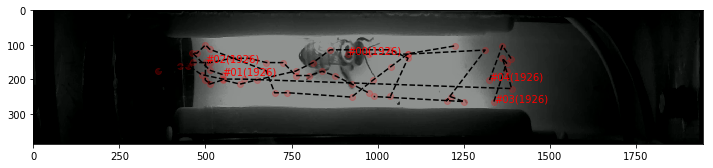

Detection/track statistics:


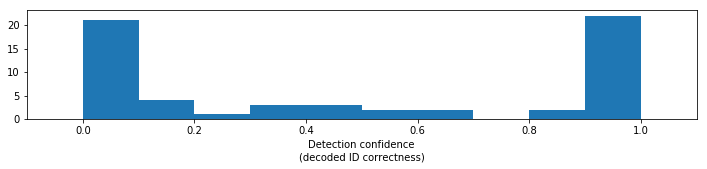

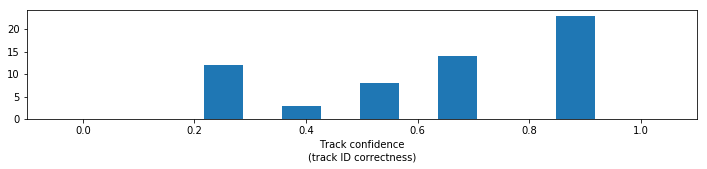

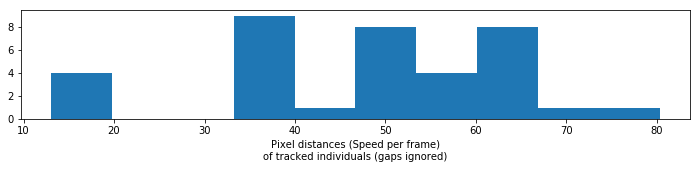

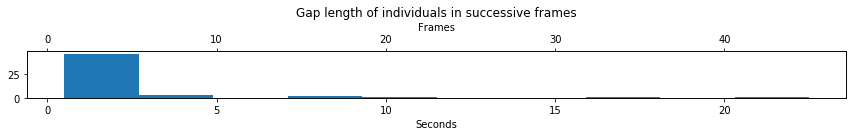

Individual statistics:


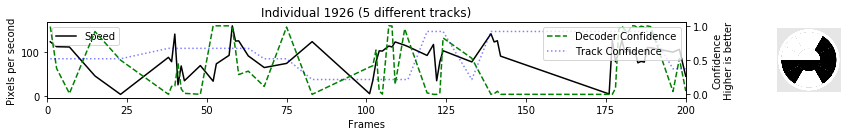

In [12]:
display_tracking_results(config["path"], frame_info, detections, tracks)

/home/tscho/anaconda3/lib/python3.6/site-packages/sklearn/base.py:312: UserWarning: Trying to unpickle estimator StandardScaler from version 0.20.0 when using version 0.19.0. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/home/tscho/anaconda3/lib/python3.6/site-packages/sklearn/base.py:312: UserWarning: Trying to unpickle estimator LinearSVC from version 0.20.0 when using version 0.19.0. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/home/tscho/anaconda3/lib/python3.6/site-packages/sklearn/base.py:312: UserWarning: Trying to unpickle estimator Pipeline from version 0.20.0 when using version 0.19.0. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/home/tscho/anaconda3/lib/python3.6/site-packages/sklearn/base.py:312: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.20.0 when using version 0.19.0. This might lead to breaking code 

Found 60 detections belonging to 5 unique tracks and 1 individuals.


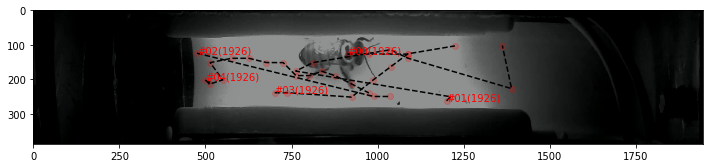

Detection/track statistics:


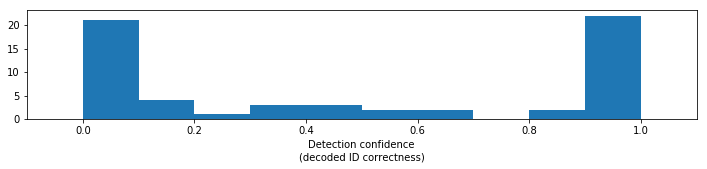

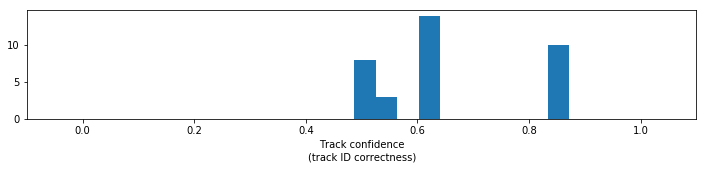

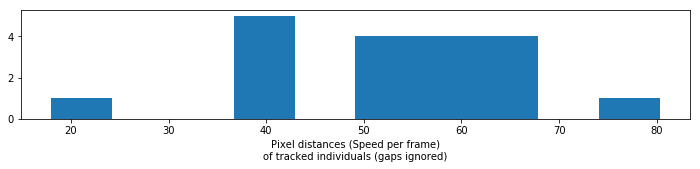

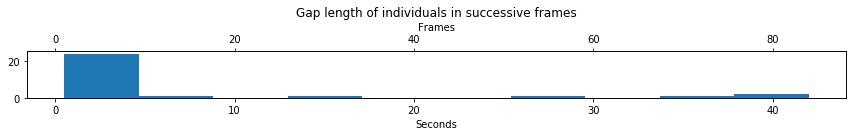

Individual statistics:


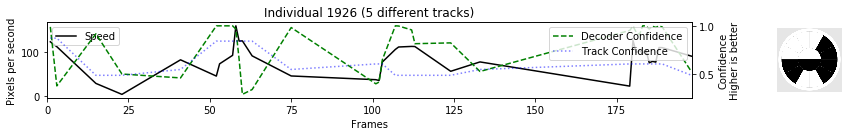

In [13]:
tracks = track_detections_dataframe(detections,
            tracker="../tracker.det_score_fun.frag_score_fun.dill",
            confidence_filter_detections=0.25,
           confidence_filter_tracks=0.2,#0.001,
            coordinate_scale=2.0,
            use_weights_for_tracked_id=True
           )
#tracks.bee_id = tracks.bee_id.astype(int)
display_tracking_results(config["path"], frame_info, detections, tracks)

In [ ]:
import bb_utils

In [ ]:
def to_bee_id(bits):
    return bb_utils.ids.BeesbookID.from_bb_binary(bits).as_ferwar()
bee_ids = list(map(to_bee_id, detections.beeID.values))
detections["bee_id"] = bee_ids

In [ ]:
with open("/home/david/Downloads/ants/detections.csv", "w") as f:
    detections.to_csv(f)
with open("/home/david/Downloads/ants/tracks.csv", "w") as f:
    tracks.to_csv(f)